plot the mean elevation and slope of the primary wet forest

In [1]:
import numpy as np
import os
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns


def subplot_twin_axes(ax_twin, list_year, array_dem, array_slope, x_axis_interval=3, y_axis_interval=None,
                      title=None, plot_legend=True, x_axis_label=None):
    sns.set_theme(style="white")
    legend_size = 26
    tick_label_size = 26
    axis_label_size = 32
    title_label_size = 30
    tick_length = 4
    lw = 2.5

    ax_twin.plot(list_year, array_dem, label='elevation', color='#4c72b0',
                 linewidth=lw, linestyle='solid',
                 marker='o', markersize=10, markerfacecolor='#4c72b0',
                 markeredgewidth=2, markeredgecolor='#4c72b0')

    ax_twin.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    ax_twin.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=True, which='major', colors='#4c72b0')

    ax_twin.set_xlabel(x_axis_label, size=axis_label_size)
    ax_twin.set_ylabel('elevation (m)', size=axis_label_size, color='#4c72b0')

    if y_axis_interval is None:
        pass
    else:
        ax_twin.yaxis.set_major_locator(plticker.MultipleLocator(base=y_axis_interval))
    ax_twin.xaxis.set_major_locator(plticker.MultipleLocator(base=x_axis_interval))

    ax_twin.yaxis.offsetText.set_fontsize(tick_label_size)
    ax_twin.set_title(title, fontsize=title_label_size)

    ax2 = ax_twin.twinx()
    ax2.plot(list_year, array_slope, label='slope', color='#ff4500',
             linewidth=lw, linestyle='solid',
             marker='s', markersize=10, markerfacecolor='#ff4500',
             markeredgewidth=2, markeredgecolor='#ff4500')

    ax2.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    ax2.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=False, which='major', colors='#ff4500')

    ax2.set_ylabel('slope (degree)', size=axis_label_size, color='#ff4500')

    lines, labels = ax_twin.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()

    if plot_legend:
        ax_twin.legend(lines + lines2, labels + labels2, loc='lower center', fontsize=legend_size, frameon=False)


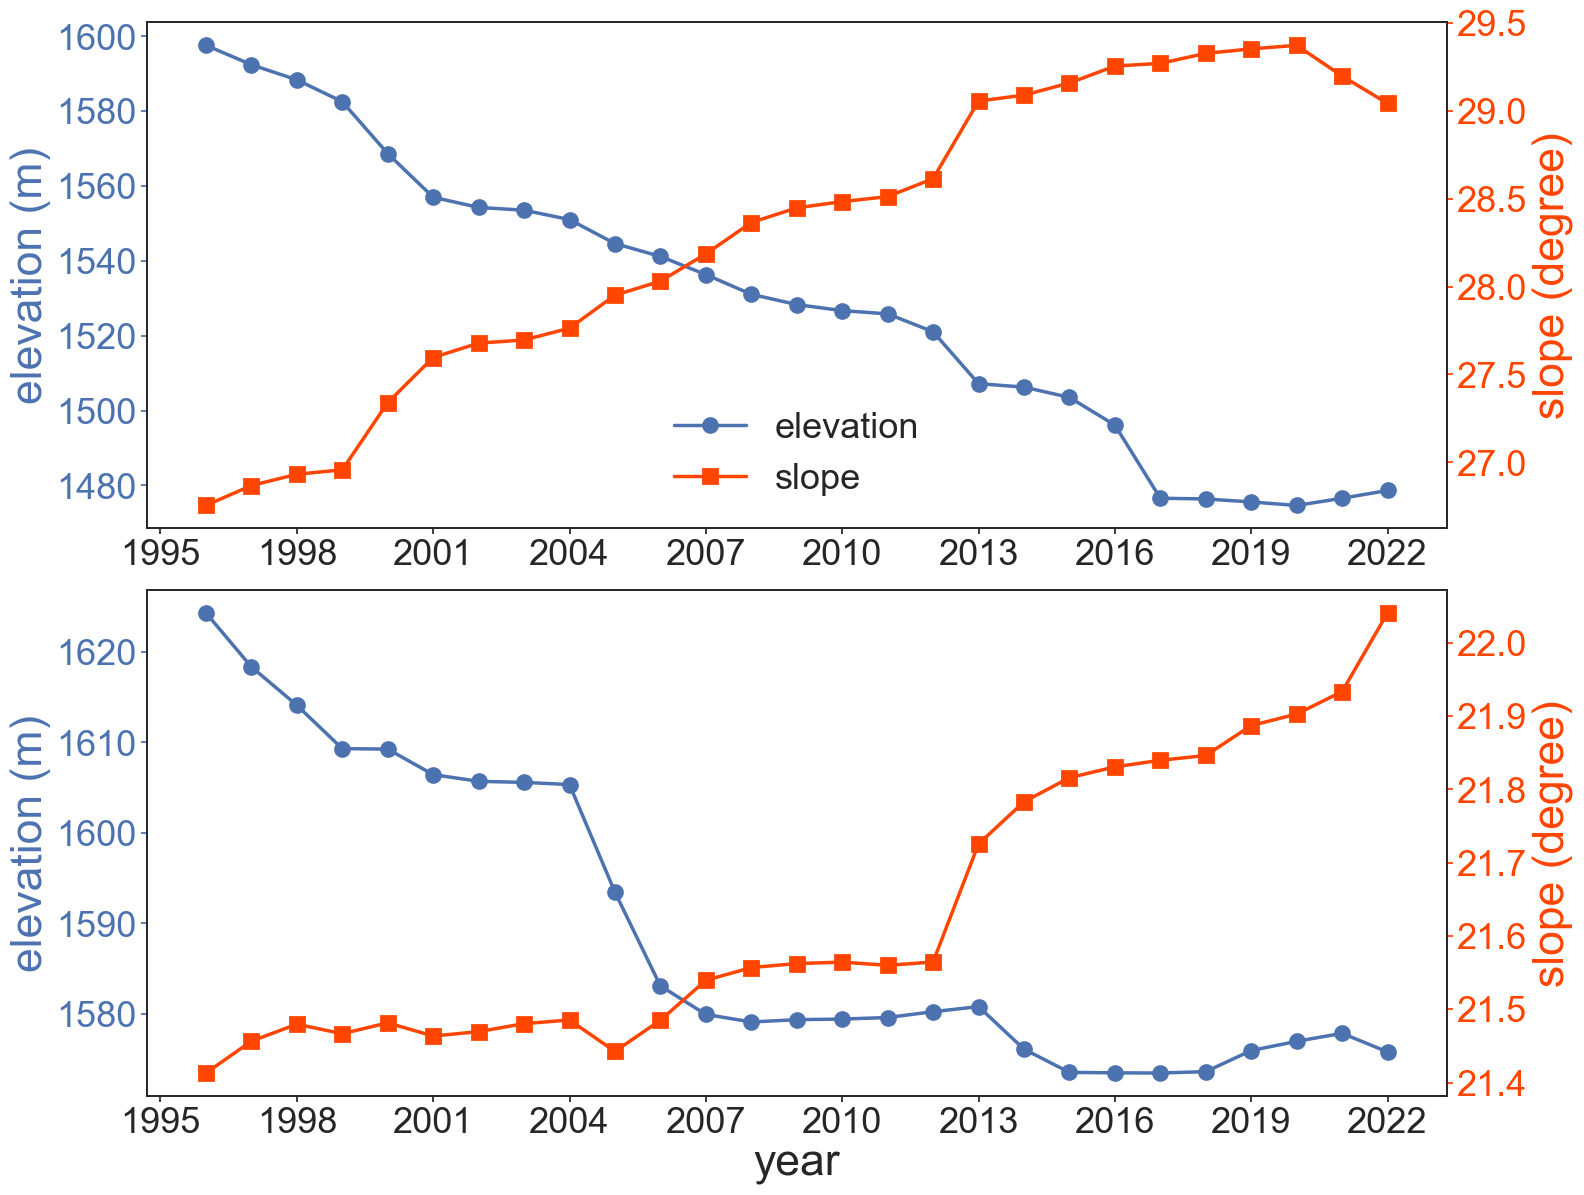

In [2]:
pwd = os.getcwd()
rootpath = os.path.abspath(os.path.join(pwd, '..'))

list_year = np.arange(1996, 2023)

df_topography = pd.read_excel(join(rootpath, 'results', 'hispaniola_pwf_topography.xlsx'))

# title = None
# figure, ax_twin = plt.subplots(ncols=1, nrows=1, figsize=(16, 12))
sns.set_theme(style="white")
figure_twin, axes_twin = plt.subplots(ncols=1, nrows=2, figsize=(16, 12))

ax = plt.subplot(2, 1, 1)

subplot_twin_axes(ax, list_year, df_topography['haiti_elevation_pwf'].values,
                  df_topography['haiti_slope_pwf'].values,
                  x_axis_interval=3, y_axis_interval=None, title=None, plot_legend=True)

ax = plt.subplot(2, 1, 2)
subplot_twin_axes(ax, list_year, df_topography['dr_elevation_pwf'].values,
                  df_topography['dr_slope_pwf'].values,
                  x_axis_interval=3, y_axis_interval=None, title=None, plot_legend=False,
                  x_axis_label='year')

plt.tight_layout()